# Tabula Muris Experiments

Running scVI variations on Tabula Muris.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%matplotlib inline

In [3]:
import boto3
import botocore
import loompy
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import Counter
from os import listdir
from os.path import isfile, join

In [165]:
from scVI.scvi.dataset import AnnDataset
from scVI.scvi.dataset import LoomDataset
from scVI.scvi.inference import UnsupervisedTrainer
from scVI.scvi.models import *

In [22]:
from data_wrangling.create_parallel_tm_dataset.create_dataset import ParallelTMDatasetCreator

dataset_creator = ParallelTMDatasetCreator(organs=["heart"])
print(dataset_creator.organs)
print(dataset_creator.smart_seq_2_annotations_file)
dataset_creator.get_smart_seq_2_organ_files()

['heart']
annotations_FACS.csv
Organ data files are: ['Heart-counts.csv']
Column names are c, e, l, l


In [29]:
ss2_data = 'TM_facs_processed.h5ad'
ss2_dataset = AnnDataset(filename=ss2_data)

tenx_data = 'TM_droplet_processed.h5ad'
tenx_dataset = AnnDataset(filename=tenx_data)

File data/TM_facs_processed.h5ad already downloaded
Preprocessing dataset
                 n_counts
index                    
1500015L24Rik     26401.0
1500016L03Rik     10060.0
1600029D21Rik  11336367.0
1700019G17Rik    130160.0
1700092K14Rik       722.0
1810024B03Rik     35167.0
1810030J14Rik  37017180.0
1810065E05Rik   3148571.0
2010107G23Rik    262340.0
2210010C04Rik   2171288.0
2210415F13Rik  18031298.0
2310042D19Rik     69574.0
2810405K02Rik    969283.0
4921539E11Rik      1523.0
4930432M17Rik       528.0
4930444F02Rik      1903.0
4930458L03Rik       309.0
4930505G20Rik       277.0
4930526L06Rik      2140.0
4930544M13Rik       611.0
4931423N10Rik      1169.0
4933403G14Rik    187946.0
4933404O12Rik     60497.0
4933411G06Rik       108.0
4933416M06Rik      3230.0
5730409E04Rik    834783.0
6330439K17Rik    122051.0
8430408G22Rik   9054365.0
9430031J16Rik      5346.0
9530002B09Rik      3913.0
...                   ...
Vip               12741.0
Vmn1r13             429.0
Vmn1r201        

In [30]:
print(ss2_dataset.nb_genes)
print(tenx_dataset.nb_genes)
print(ss2_dataset.n_labels)
print(tenx_dataset.n_labels)
print(tenx_dataset.obs)
print(ss2_dataset.obs)

999
999
1
1
                              channel mouse.id   tissue subtissue mouse.sex  \
index                                                                         
10X_P4_0_AAACCTGAGATTACCC    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGAGTGCCAGA    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGCAAATCCGT    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGGTAATCGTC    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGGTCCAACTA    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGGTGATAAAC    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACCTGTCAGATAAG    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACGGGCACACATGT    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACGGGGTAGTGAAT    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACGGGGTATTAGCC    10X_P4_0    3-M-8   Tongue       nan         M   
10X_P4_0_AAACGGGTCAAACAAG    10X_P4_0   

In [26]:
import anndata

In [ ]:
ad = anndata.read_h5ad(os.path.join(self.save_path, self.download_name))

In [97]:
ds = loompy.connect("data/maca-facs-processed-annotated.loom")
gene_by_cells_total = ds[:, :]

In [98]:
# Print out dimensions of the matrix
print(f"The dimensions (number of genes by the number of cells) of the matrix are: {ds.shape}\n")

# Print other interesting bits of information
number_of_nonzero_vals = np.count_nonzero(gene_by_cells_total) # Takes a couple minutes to run
print(f"Number of non-zero entries: {number_of_nonzero_vals}. Percentage = {(100 * number_of_nonzero_vals) / (ds.shape[0] * ds.shape[1])}")

# Print attributes of the cells & genes that have been sequenced
print(f"Cell attributes: {ds.ca.keys()}\n")
print(f"Gene attributes: {ds.ra.keys()}")

# Some interesting attributes...
age_labels = np.unique(ds.ca["age"])
print(f"Age labels: {age_labels}")
cell_type_labels = np.unique(ds.ca["cell_ontology_class"])
print(f"Cell type labels: {cell_type_labels}")
tissue_labels = np.unique(ds.ca["tissue"])
print(f"Tissue labels: {tissue_labels}")
batches = np.unique(ds.ca["batch"])
print(f"Batches: {batches}")
cells_by_batches = Counter(ds.ca["batch"])
cells_by_age = Counter(ds.ca["age"])
cells_by_tissue = Counter(ds.ca["tissue"])
print(cells_by_batches)
print(cells_by_age)
print(cells_by_tissue)
# NOTE: BATCH == AGE

The dimensions (number of genes by the number of cells) of the matrix are: (22899, 87855)

Number of non-zero entries: 214012247. Percentage = 10.637893219802093
Cell attributes: ['FACS.selection', 'age', 'auto_cell_ontology_class', 'auto_free_annotation', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'cellid', 'free_annotation', 'louvain', 'method', 'mouse.id', 'n_counts', 'n_genes', 'obs_names', 'plate', 'sex', 'subtissue', 'tissue', 'well']

Gene attributes: ['dispersions', 'dispersions_norm', 'highly_variable', 'means', 'n_cells', 'var_names']
Age labels: ['24m' '3m']
Cell type labels: ['B cell' 'Bergmann glial cell'
 'Brush cell of epithelium proper of large intestine'
 'CD8-positive, alpha-beta T cell' 'Cd4+ macrophage' 'DN4 thymocyte'
 'HSC enriched fraction' 'Il6 expressing cells' 'Kidney-new-24m-cluster'
 'Kupffer cell' 'MPP Fraction A' 'MPP Fraction B' 'MPP Fraction C'
 'Marrow Cd4 T cell' 'Marrow-unknown-progenitor' 'NK cell' 'T cell'
 'alveolar macrophage' 'ao

In [112]:
# Get the ids of the tissues I want
tissues_i_want = ["Fat", "Brain_Myeloid", "Brain_Non-Myeloid"]

tissue_values = ds.ca["tissue"]
print(tissue_values[0:10])
tissue_indices = []
for index, value in enumerate(tissue_values):
    if value in tissues_i_want:
        tissue_indices.append(index)
tissue_indices.sort()
print(len(tissue_indices))
#print(len(np.ravel(np.array(np.where(tissue_values == "Fat"))).tolist()))

['Fat' 'Fat' 'Fat' 'Fat' 'Bladder' 'Brain_Myeloid' 'Brain_Myeloid'
 'Brain_Non-Myeloid' 'Brain_Myeloid' 'Marrow']
26770


In [113]:
# Create cell attributes
pruned_cell_attributes = {}
for cell_attribute in ds.ca.keys():
    pruned_cell_data = np.take(ds.ca[cell_attribute], tissue_indices)
    pruned_cell_attributes[cell_attribute] = pruned_cell_data
    
# Create gene attributes
variance_of_genes = np.var(pruned_matrix, axis=0)
top_idx = np.argsort(variance_of_genes)[-700:]
pruned_gene_attributes = {}
for gene_attribute in ds.ra.keys():
    pruned_gene_data = np.take(ds.ra[gene_attribute], top_idx)
    pruned_gene_attributes[gene_attribute] = pruned_gene_data
    
# Create matrix
print(f"Before matrix: {gene_by_cells_total.shape}")
pruned_matrix = np.take(gene_by_cells_total, tissue_indices, axis=1)
pruned_matrix = np.take(pruned_matrix, top_idx, axis=0)
print(f"After matrix: {pruned_matrix.shape}")

Before matrix: (22899, 87855)
After matrix: (700, 26770)


In [114]:
# Create Loom file
loompy.create("maca_facs_fat_brain_only.loom", pruned_matrix, pruned_gene_attributes, pruned_cell_attributes)

In [234]:
from scVI.scvi.dataset import LoomDataset
from scVI.scvi.inference import UnsupervisedTrainer
from scVI.scvi.models import *

In [235]:
# Load dataset for use
maca_subsample_dataset = LoomDataset("maca_facs_fat_brain_only.loom") # Takes a few minutes

File data/maca_facs_fat_brain_only.loom already downloaded
Preprocessing dataset: maca_facs_fat_brain_only.loom
Extracting gene information from dataset
Extracting batch information from dataset
Extracting organ information from dataset
Extracting cell type information from dataset
Final matrix shape is: (26770, 700)
Finished preprocessing dataset


In [236]:
print(maca_subsample_dataset.nb_genes)
print(maca_subsample_dataset.n_batches)
print(maca_subsample_dataset.n_labels)
print(maca_subsample_dataset.n_organ_labels)

700
2
24
3


In [237]:
# Training parameters
num_epochs = 20 # 100
learning_rate = 1e-4 # 1e-5
use_batches = False
use_cuda = True
latent_dimensions = 10 # 15
hidden_layer_nodes = 256 # 512

In [238]:
vae = VAE(maca_subsample_dataset.nb_genes, 
          n_batch=maca_subsample_dataset.n_batches * use_batches, 
          n_hidden=hidden_layer_nodes, 
          n_latent=latent_dimensions)
trainer = UnsupervisedTrainer(vae,
                              maca_subsample_dataset,
                              train_size=0.75,
                              use_cuda=use_cuda,
                              frequency=5,
                              verbose=True)
trainer.train(n_epochs=num_epochs, lr=learning_rate)


EPOCH [0/20]: 
Train Set : LL : 894.5067
Test Set : LL : 888.1468

EPOCH [5/20]: 
Train Set : LL : 309.5480
Test Set : LL : 309.8967

EPOCH [10/20]: 
Train Set : LL : 227.9773
Test Set : LL : 228.4519

EPOCH [15/20]: 
Train Set : LL : 217.2572
Test Set : LL : 218.4271

EPOCH [20/20]: 
Train Set : LL : 210.4828
Test Set : LL : 211.8716

Training time:  136 s. / 20 epochs


[894.5066731365492, 309.54796844648104, 227.97732363214126, 217.2572014735456, 210.48282423217486]


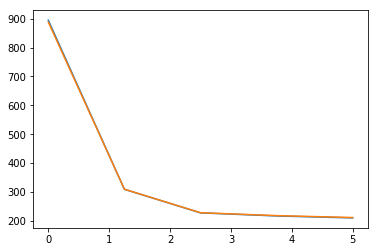

In [239]:
%matplotlib inline
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
print(ll_train_set)
x = np.linspace(0,5,(len(ll_train_set)))
plt.figure(3)
plt.plot(x, ll_train_set)
plt.plot(x, ll_test_set)

In [240]:
#latent, batch_indices, labels, tissue_labels = trainer.train_set.get_latent(sample=True)
#print(latent is None)

dataset = trainer.train_set
n_samples = 1000

latent, batch_indices, labels, tissue_labels = dataset.get_latent(sample=True)
latent, idx_t_sne = dataset.apply_t_sne(latent, n_samples)
batch_indices = batch_indices[idx_t_sne].ravel()
labels = labels[idx_t_sne].ravel()
tissue_labels = tissue_labels[idx_t_sne].ravel()

In here with tensor: [tensor([[0.0000, 0.0000, 0.0000,  ..., 0.1771, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0003,  ..., 0.0000, 0.6934, 0.8149],
        [0.0000, 0.0000, 4.8346,  ..., 2.8324, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 4.6497, 0.0000, 2.2893],
        [0.0000, 0.0000, 0.0000,  ..., 0.5589, 0.0000, 0.5348]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0743,  ..., 0.0000, 0.0000, 2.0309],
        [0.0000, 0.0000, 3.9727,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 7.2118,  ..., 0.1427, 0.0000, 0.0000],
        [0.0000, 0.0000, 3.0931,  ..., 0.0000, 0.3058, 1.3673]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1972],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2196, 0.0000, 0.2209],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4295]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 2.5131, 0.0000, 2.1263],
        [0.0000, 0.0000, 2.2357,  ..., 2.4051, 0.0000, 0.7481],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.1584],
        [0.0000, 0.0000, 0.0000,  ..., 1.2251, 0.0000, 0.3755],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 4.7213]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 2.2087,  ..., 3.2193, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 9.7477, 3.0979],
        [0.0000, 0.0000, 3.5184,  ..., 4.4203, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.2139, 0.0000, 1.0106],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.1177],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 0.0000,  ..., 0.6450, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.3059],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.4165, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.4360, 0.0000, 1.2598],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

In here with tensor: [tensor([[0.0000, 0.0000, 1.8445,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]), tensor([[4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
        [4.6773],
   

['B cell' 'Bergmann glial cell' 'CD8-positive, alpha-beta T cell'
 'Il6 expressing cells' 'NK cell' 'T cell' 'astrocyte' 'bladder cell'
 'bladder urothelial cell' 'brain pericyte' 'endothelial cell'
 'ependymal cell' 'epithelial cell' 'interneuron' 'macrophage'
 'medium spiny neuron' 'mesenchymal stem cell of adipose'
 'microglial cell' 'myeloid cell' 'nan' 'neuron' 'neuronal stem cell'
 'oligodendrocyte' 'oligodendrocyte precursor cell']
['Brain_Myeloid' 'Brain_Non-Myeloid' 'Fat']


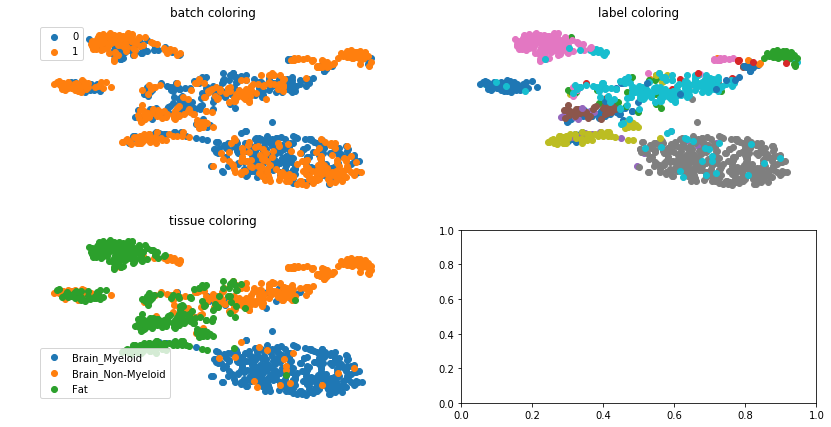

In [241]:
n_batch = maca_subsample_dataset.n_batches
fig, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.flatten()
batch_indices = batch_indices.ravel()
for i in range(n_batch):
    axes[0].scatter(latent[batch_indices == i, 0], latent[batch_indices == i, 1], label=str(i))
axes[0].set_title("batch coloring")
axes[0].axis("off")
axes[0].legend()

indices = labels.ravel()
if hasattr(maca_subsample_dataset, 'cell_types'):
    plt_labels = maca_subsample_dataset.cell_types
    print(plt_labels)
else:
    plt_labels = [str(i) for i in range(len(np.unique(indices)))]
for i, cell_type in zip(range(maca_subsample_dataset.n_labels), plt_labels):
    axes[1].scatter(latent[indices == i, 0], latent[indices == i, 1], label=cell_type)
axes[1].set_title("label coloring")
axes[1].axis("off")
#axes[1].legend(loc="center")

tissue_indices = tissue_labels.ravel()
if hasattr(maca_subsample_dataset, 'organ_labels'):
    tissue_plt_labels = maca_subsample_dataset.organ_types
    print(tissue_plt_labels)
else:
    tissue_plt_labels = [str(i) for i in range(len(np.unique(tissue_indices)))]
for i, tissue in zip(range(maca_subsample_dataset.n_organ_labels), tissue_plt_labels):
    axes[2].scatter(latent[tissue_indices == i, 0], latent[tissue_indices == i, 1], label=tissue)
axes[2].set_title("tissue coloring")
axes[2].axis("off")
axes[2].legend(np.unique(tissue_plt_labels))

In [140]:
latent, batch_indices, labels = trainer.train_set.get_latent(sample=True)
print(labels)
count = 0
for tensor in trainer.train_set:
    sample_batch, local_l_mean, local_l_var, batch_index, label = tensor
    print(label)
    count += 1
print(count)

[19 17  0 ... 17 16 22]


ValueError: not enough values to unpack (expected 6, got 5)